# Runge-Kutta Methods (Practice)
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(\mathbf{y}(x),x)
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}.
\end{equation}

IDEA: discretize variables by letting $x\rightarrow x_{i}$ and $\mathbf{y}(x_{i})\rightarrow \mathbf{y}_{i}$, for $i=0,\ldots,N$. Then use knowledge about $\mathbf{y}_{i}$'s (and possibly derivatives of $\mathbf{y}$) at "earlier" points to approximate (guess) their values at "later" points. An approximate solution is found in this way by "marching" along the independent variable, starting with the given initial values $\mathbf{y}_{0}$ at $x_{0}$.

PRE-REQUISITES:
- [ode-solve-euler.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-euler.ipynb) (introduction to numerical methods for ODE's, Euler method, error analysis, convergence tests)
- [ode-solve-rk-theory.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-rk-theory.ipynb) (Runge-Kutta theory, derivation of formulae, tables)

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.
- [4] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.


In [2]:
%%writefile rk4_step.py

import numpy as np

def rk4_step (x, y, f, h):
    """
    Fourth-order Runge-Kutta method to solve a system of first-order 
    differential equations subject to initial conditions.
    
    INPUT:
    x = current x position
    y = current y values (1D array)
    f = rhs function handle (takes x and y as arguments)
    h = current stepsize
    
    OUTPUT:
    YY = new y value (1D array)
    """
    
    # Runge-Kutta coefficients
    k1 = h*f(x,y)
    k2 = h*f(x + h/2, y + (1/2)*k1)
    k3 = h*f(x + h/2, y + (1/2)*k2)
    k4 = h*f(x + h, y + k3)
        
    # advance the solution
    YY = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return YY 

Writing rk4_step.py


In [5]:
%run euler_step.py
%run euler_midpt_step.py
%run euler_meanval_step.py
%run rk4_step.py

<IPython.core.display.Javascript object>


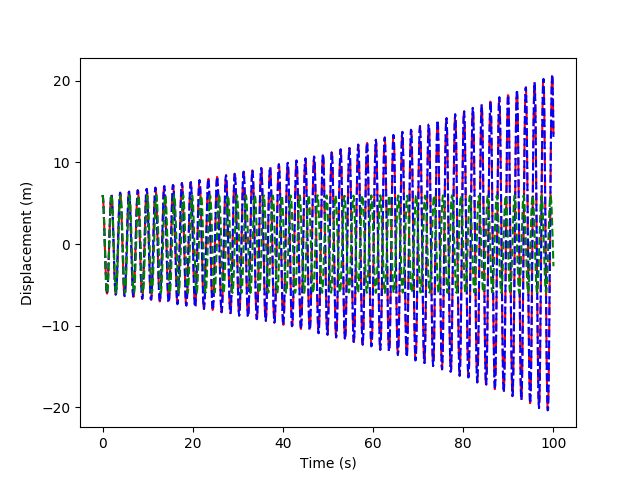

In [13]:
# oscillator
"""
Program to compute the motion of a one-dimensional oscillator
"""

import numpy as np

# oscillator rhs function
def f (t, x):
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -omega0**2*x[0] - 2*beta*x[1] + F(t, f0, omegaF)
    return dxdt

# driving force
def F(t, amp, freq):
    return amp*np.cos(freq*t)

# set model parameters
mass = 1.0
springK = 10.0
omega0 = np.sqrt(springK/mass)
beta = 0.0
f0 = 0.0
omegaF = 0.*omega0

# set initial position and velocity 
x0 = 6.0
v0 = 0.0

# number of steps, time grid, stepsize
tStart = 0.0
tEnd = 100.0
nsteps = 1000
h = (tEnd - tStart)/nsteps
t = np.linspace(tStart, tEnd, nsteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays (euler)
x = np.zeros((2, nsteps + 1))
x[0] = x0
x[1] = v0

# initialize output arrays (midpoint euler)
x_mid = np.zeros_like(x)
x_mid[0] = x[0]
x_mid[1] = x[1]

# initialize output arrays (mean-value euler)
x_mv = np.zeros_like(x)
x_mv[0] = x[0]
x_mv[1] = x[1]

# initialize output arrays (4th order Runge-Kutta)
x_rk4 = np.zeros_like(x)
x_rk4[0] = x[0]
x_rk4[1] = x[1]

# numerical solution 
for i in range(0, nsteps): 

    # apply ODE-solver step
    x[:,i+1] = euler_step(t[i], x[:,i], f, h)
    x_mid[:,i+1] = euler_midpt_step(t[i], x_mid[:,i], f, h)
    x_mv[:,i+1] = euler_meanval_step(t[i], x_mv[:,i], f, h)
    x_rk4[:,i+1] = rk4_step(t[i], x_rk4[:,i], f, h)
    t[i+1] = t[i] + h

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
#ax1.plot(t, x[0,:],'k-', label='simple Euler')
ax1.plot(t, x_mid[0,:],'r-.', label='midpoint Euler')
ax1.plot(t, x_mv[0,:],'b--', label='mean-value Euler')
ax1.plot(t, x_rk4[0,:],'g--', label='4th order Runge-Kutta')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')
fig.show()

<IPython.core.display.Javascript object>


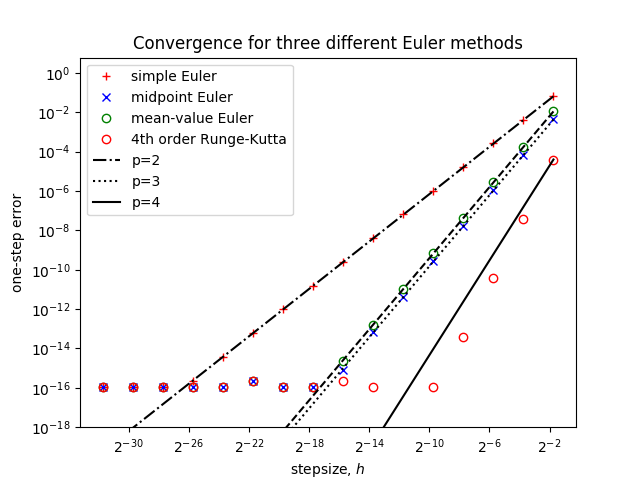

In [14]:
### convergence test ###
import numpy as np 

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def y_exact(x, x0 ,y0):
    return (x + 1)**2 + (y0 - (x0 + 1)**2)*np.exp(x - x0)

# initial conditions
x0 = 0.
y0 = 0.5

# compute stepsizes
xmin = x0
xmax = 3.0
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 30, 16, base=2)
hvals = (xmax - xmin)/nsteps

# initialize one-step error arrays
err_eul = np.zeros_like(hvals)
err_mid = np.zeros_like(hvals)
err_mv = np.zeros_like(hvals)
err_rk4 = np.zeros_like(hvals)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)):

    # step-size 
    h = hvals[i]

    # initialize output arrays
    x = np.zeros(2)
    x[0] = x0

    y_eul = np.zeros_like(x)
    y_eul[0] = y0

    y_mid = np.zeros_like(x)
    y_mid[0] = y0

    y_mv = np.zeros_like(x)
    y_mv[0] = y0

    y_rk4 = np.zeros_like(x)
    y_rk4[0] = y0

    
    # numerical solutions
    x[1] = x[0] + h
    y_eul[1] = euler_step(x[0], y_eul[0], f, h)
    y_mid[1] = euler_midpt_step(x[0], y_mid[0], f, h)
    y_mv[1] = euler_meanval_step(x[0], y_mv[0], f, h)
    y_rk4[1] = rk4_step(x[0], y_rk4[0], f, h)

    # calculate one-step errors
    err_eul[i] = np.abs(y_eul[1] - y_exact(x[1], x0, y0))
    err_mid[i] = np.abs(y_mid[1] - y_exact(x[1], x0, y0))
    err_mv[i] = np.abs(y_mv[1] - y_exact(x[1], x0, y0))
    err_rk4[i] = np.abs(y_rk4[1] - y_exact(x[1], x0, y0))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals, err_eul, 'r+', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='simple Euler')
ax1.loglog(hvals, err_mid, 'bx', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='midpoint Euler')
ax1.loglog(hvals, err_mv, 'go', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='mean-value Euler')
ax1.loglog(hvals, err_rk4, 'ro', \
           markersize=6, markeredgewidth=1, markerfacecolor='none', label='4th order Runge-Kutta')
ax1.loglog(hvals, err_eul[0]*(hvals/hvals[0])**2, 'k-.', label='p=2')
ax1.loglog(hvals, err_mid[0]*(hvals/hvals[0])**3, 'k:', label='p=3')
ax1.loglog(hvals, err_mv[0]*(hvals/hvals[0])**3, 'k--', label='p=3')
ax1.loglog(hvals, err_rk4[0]*(hvals/hvals[0])**4, 'k-', label='p=4')
ax1.set_xscale('log', basex=2)
ax1.set_xlabel(r"stepsize, $h$")
ax1.set_ylabel(r"one-step error")
ax1.set_ylim(1e-18)
ax1.set_title("Convergence for different methods")
ax1.legend(loc="upper left", numpoints=1)
fig.show()